<a href="https://colab.research.google.com/github/VictorSepulveda1994/Minor-Machine-Learning/blob/main/notebooks/2_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/drive/1OkpxtDJri93FBHi67LOmWH4xd63i6dYs#scrollTo=__eamjB8fCPc" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

# ![](https://images.g2crowd.com/uploads/product/image/social_landscape/social_landscape_656e174b12c49be1cfb4723a938ea43e/pytorch.png)



PyTorch es un **Framework de Deep Learning** de código abierto que se utiliza para desarrollar y entrenar redes neuronales. Es desarrollado principalmente por el grupo de investigación de IA de Facebook. PyTorch se puede usar tanto con Python como con C++. Naturalmente, la interfaz de Python está más pulida. 

Un Framework de Deep Learning es un conjunto de interfaces, librerías o herramientas que nos permiten construir modelos de aprendizaje profundo de manera más fácil y rápida, sin entrar en los detalles de los algoritmos subyacentes. Proporcionan una forma clara y concisa de definir modelos utilizando una colección de componentes optimizados y prediseñados. Sus principales características son:
* Codificación en alto nivel
* Cálculo automático de los gradientes
* Paralelización de los procesos
* Soporte de la comunidad

A diferencia de la mayoría de los otros frameworks populares como TensorFlow, que utilizan grafos computacionales estáticos, PyTorch utiliza grafos dinámicos, lo que permite una mayor flexibilidad en la construcción de arquitecturas complejas. 

Además, Pytorch utiliza conceptos básicos de Python como clases, estructuras y bucles condicionales, que son muy familiares para nuestros ojos y, por lo tanto, mucho más intuitivos de entender. Esto lo hace mucho más simple que otros frameworks como TensorFlow que aportan su propio estilo de programación.




Introducción a los Tensores de PyTorch
===============================



Los tensores son la abstracción de datos central en PyTorch. Este notebook interactivo
 proporciona una introducción detallada a la clase ``torch.Tensor``.

Lo primero es lo primero, importemos el módulo PyTorch. También agregaremos
el módulo `math` de Python para facilitar algunos de los ejemplos.


In [ ]:
import torch
import math

Crear tensores
----------------

La forma más sencilla de crear un tensor es con la llamada ``torch.empty()``:




In [ ]:
x = torch.empty(3, 4, 5,dtype=torch.int16)
print(type(x))
print(x)

<class 'torch.Tensor'>
tensor([[[ 6272,  1359,     0,     0,    77],
         [    0,     0,     0,     0,     0],
         [    0,     0,     0,     0,     0],
         [    0,     0,     0,  8293, 29796]],

        [[ 8827, 29811, 29793, 29557, 14882],
         [ 8736, 27503, 11298,  8736, 30821],
         [25445, 29813, 28521, 24430, 28515],
         [28277,  8820,  8250, 11314,  8736]],

        [[29557, 29285, 25951, 28792, 25970],
         [29555, 28521, 29550, 14882, 31520],
         [11389,  8736, 24944, 27769, 24943],
         [ 8804,  8250, 23899, 15741, 28494]]], dtype=torch.int16)


In [ ]:
x2 = torch.empty(3, 4,dtype=torch.int16)
print(type(x2))
print(x2)

<class 'torch.Tensor'>
tensor([[3456, 1656,    0,    0],
        [  24,    0,    0,    0],
        [  -1,   -1,    0,    0]], dtype=torch.int16)


Desempaquemos lo que acabamos de hacer:

- Creamos un tensor utilizando uno de los numerosos métodos constructores provistos por ``torch``.
- El tensor en sí es bidimensional, tiene 3 filas y 4 columnas.
- El tipo de objeto devuelto es ``torch.Tensor``, que es un
   alias para ``torch.FloatTensor``; por defecto, los tensores de PyTorch son
   poblados con números de punto flotante de 32 bits. 
- Probablemente verá algunos valores de aspecto aleatorio al imprimir su
   tensor. La llamada ``torch.empty()`` asigna memoria para el tensor,
   pero no lo inicializa con ningún valor, por lo que lo que está viendo es
   lo que estaba en la memoria en el momento de la asignación.

Una breve nota sobre los tensores y su número de dimensiones, y
terminología:

- A veces verás un tensor unidimensional llamado
   **vector**
- Del mismo modo, un tensor bidimensional a menudo se denomina
   **matriz**
- Cualquier cosa con más de dos dimensiones generalmente es solo
   llamado tensor.

La mayoría de las veces, querrá inicializar su tensor con algún
valor. Los casos comunes son todos ceros, todos unos o valores aleatorios, y el
 módulo ``torch`` proporciona métodos constructores para todos estos:




In [ ]:
zeros = torch.zeros(2, 3, 4)
print(zeros)

ones = torch.ones(2, 3, 4)
print(ones)

torch.manual_seed(1729)
random = torch.rand(2, 3, 4)
print(random)

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])
tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])
tensor([[[0.3126, 0.3791, 0.3087, 0.0736],
         [0.4216, 0.0691, 0.2332, 0.4047],
         [0.2162, 0.9927, 0.4128, 0.5938]],

        [[0.6128, 0.1519, 0.0453, 0.5035],
         [0.9978, 0.3884, 0.6929, 0.1703],
         [0.1384, 0.4759, 0.7481, 0.0361]]])


Todos los métodos constructores hacen exactamente lo que cabría esperar: tenemos un tensor
lleno de ceros, otro lleno de unos y otro con valores aleatorios
entre 0 y 1.



### Tensores Aleatorios y Semillas

Hablando del tensor aleatorio, ¿notaste la llamada a
``torch.manual_seed()`` inmediatamente anterior? Inicializar tensores,
como los pesos de aprendizaje de un modelo, con valores aleatorios es común pero
hay momentos, especialmente en entornos de investigación, en los que querrá
cierta seguridad de la reproducibilidad de sus resultados. Asignar manualmente 
la semilla de su generador de números aleatorios es la forma de hacer esto. Miremos
más cerca:




In [ ]:
torch.manual_seed(1729)
random1 = torch.rand(2, 3)
print(random1)

random2 = torch.rand(2, 3)
print(random2)

torch.manual_seed(1729)
random3 = torch.rand(2, 3)
print(random3)

random4 = torch.rand(2, 3)
print(random4)

tensor([[0.3126, 0.3791, 0.3087],
        [0.0736, 0.4216, 0.0691]])
tensor([[0.2332, 0.4047, 0.2162],
        [0.9927, 0.4128, 0.5938]])
tensor([[0.3126, 0.3791, 0.3087],
        [0.0736, 0.4216, 0.0691]])
tensor([[0.2332, 0.4047, 0.2162],
        [0.9927, 0.4128, 0.5938]])


Lo que deberías ver arriba es que ``random1`` y ``random3`` llevan
valores idénticos, al igual que ``random2`` y ``random4``. La asignación manual
la semilla del generador de numeros aleatorios lo reinicia, de modo que los cálculos idénticos sobre
números aleatorios deberían, en la mayoría de los entornos, proporcionar resultados idénticos.

Para obtener más información, consulte la documentación de PyTorch sobre
reproducibilidad <https://pytorch.org/docs/stable/notes/randomness.html>`__.






### Formas de los Tensores

A menudo, para poder realizar operaciones en dos o más tensores, estos
tendrán que tener la misma ***forma***, es decir, tener el mismo número de
dimensiones y el mismo número de celdas en cada dimensión. Para garantizar eso existen los métodos ``torch.*_like()``:

In [ ]:
x = torch.empty(2, 2, 3)
print(x.shape)
print(x)

empty_like_x = torch.empty_like(x)
print(empty_like_x.shape)
print(empty_like_x)

zeros_like_x = torch.zeros_like(x)
print(zeros_like_x.shape)
print(zeros_like_x)

ones_like_x = torch.ones_like(x)
print(ones_like_x.shape)
print(ones_like_x)

rand_like_x = torch.rand_like(x)
print(rand_like_x.shape)
print(rand_like_x)

torch.Size([2, 2, 3])
tensor([[[1.0318e-35, 0.0000e+00, 1.5414e-43],
         [1.4013e-43, 1.3312e-43, 1.5134e-43]],

        [[1.4714e-43, 1.4994e-43, 1.4153e-43],
         [1.3312e-43, 1.6816e-43, 0.0000e+00]]])
torch.Size([2, 2, 3])
tensor([[[1.0318e-35, 0.0000e+00, 3.3631e-44],
         [0.0000e+00,        nan, 1.5912e+00]],

        [[1.1578e+27, 1.1362e+30, 7.1547e+22],
         [4.5828e+30, 1.2121e+04, 7.1846e+22]]])
torch.Size([2, 2, 3])
tensor([[[0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.]]])
torch.Size([2, 2, 3])
tensor([[[1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.]]])
torch.Size([2, 2, 3])
tensor([[[0.6128, 0.1519, 0.0453],
         [0.5035, 0.9978, 0.3884]],

        [[0.6929, 0.1703, 0.1384],
         [0.4759, 0.7481, 0.0361]]])


Lo primero nuevo en la celda de código de arriba es el uso del atributo ``.shape``
de todo tensor. Este atributo contiene una lista con el tamaño de
cada dimensión de un tensor - en nuestro caso, ``x`` es un tensor tridimensional
 con forma 2 x 2 x 3.

Debajo de eso, llamamos a los métodos ``.empty_like()``, ``.zeros_like()``,
``.ones_like()`` y ``.rand_like()``. Usando el atributo ``.shape``, podemos verificar que cada uno de estos métodos devuelve un tensor de
dimensionalidad y extensión idénticas.

La última forma de crear un tensor es especificar sus datos
directamente desde una colección de PyTorch:



In [ ]:
some_constants = torch.tensor([[3.1415926, 2.71828], [1.61803, 0.0072897]])
print(some_constants)

some_integers = torch.tensor((2, 3, 5, 7, 11, 13, 17, 19))
print(some_integers)

more_integers = torch.tensor(((2, 4, 6), [3, 6, 9]))
print(more_integers)

tensor([[3.1416, 2.7183],
        [1.6180, 0.0073]])
tensor([ 2,  3,  5,  7, 11, 13, 17, 19])
tensor([[2, 4, 6],
        [3, 6, 9]])


Usar ``torch.tensor()`` es la forma más sencilla de crear un
tensor si ya tiene datos en una tupla o lista de Python. Como se muestra
anterior, el anidamiento de las colecciones dará como resultado un tensor multidimensional.


### Tipos de datos de un Tensor

Establecer el tipo de datos de un tensor es posible de dos maneras:



In [ ]:
a = torch.ones((2, 3), dtype=torch.int16)
print(a)

b = torch.rand((2, 3), dtype=torch.float64) * 20.
print(b)

c = b.to(torch.int32)
print(c)

tensor([[1, 1, 1],
        [1, 1, 1]], dtype=torch.int16)
tensor([[ 0.9956,  1.4148,  5.8364],
        [11.2406, 11.2083, 11.6692]], dtype=torch.float64)
tensor([[ 0,  1,  5],
        [11, 11, 11]], dtype=torch.int32)


La forma más sencilla de establecer el tipo de datos subyacente de un tensor es con un argumento opcional en el momento de la creación. En la primera línea de la celda de arriba,
configuramos ``dtype=torch.int16`` para el tensor ``a``. Cuando imprimimos ``a``, podemos ver que está lleno de ``1`` en lugar de ``1.`` - Python indica que este es un tipo entero en lugar de un punto flotante.

Otra cosa a tener en cuenta sobre la impresión de ``a`` es que, a diferencia de cuando dejamos ``dtype`` como predeterminado (coma flotante de 32 bits), imprimiendo el tensor también especifica su ``dtype``.

Es posible que también haya notado que pasamos de especificar la forma del tensor como una serie de argumentos enteros, a agrupar esos argumentos en un tupla. Esto no es estrictamente necesario: PyTorch tomará una serie de argumentos enteros iniciales sin etiquetar como la forma del tensor, pero al agregar
los argumentos opcionales, ponerlos como tupla puede hacer que su intención sea más legible.

La otra forma de establecer el tipo de datos es con el método ``.to()``. En la celda de arriba, creamos un tensor de punto flotante aleatorio ``b`` de la manera habitual. A continuación, creamos ``c`` convirtiendo ``b`` en un tensor entero  de 32 bits
con el método ``.to()``. Tenga en cuenta que ``c`` contiene todos los mismos valores como ``b``, pero truncados a enteros.

Los tipos de datos disponibles incluyen:

-  ``torch.bool``
-  ``torch.int8``
-  ``torch.uint8``
-  ``torch.int16``
-  ``torch.int32``
-  ``torch.int64``
-  ``torch.half``
-  ``torch.float``
-  ``torch.double``
-  ``torch.bfloat``





Matemáticas y lógica con tensores PyTorch
---------------------------------

Ahora que conoces algunas de las formas de crear un tensor… ¿qué puedes hacer con ellos?

Veamos primero la aritmética básica y cómo interactúan los tensores con
escalares simples:


In [ ]:
ones = torch.zeros(2, 2) + 1
twos = torch.ones(2, 2) * 2
threes = (torch.ones(2, 2) * 7 - 1) / 2
fours = twos ** 2
sqrt2s = twos ** 0.5

print(ones)
print(twos)
print(threes)
print(fours)
print(sqrt2s)

tensor([[1., 1.],
        [1., 1.]])
tensor([[2., 2.],
        [2., 2.]])
tensor([[3., 3.],
        [3., 3.]])
tensor([[4., 4.],
        [4., 4.]])
tensor([[1.4142, 1.4142],
        [1.4142, 1.4142]])



Como puedes ver arriba, las operaciones aritméticas entre tensores y escalares,
como suma, resta, multiplicación, división y
exponenciación se aplican elemento a elemento dentro del tensor. Dado que
la salida de tal operación será un tensor, puedes encadenarlos
junto con las reglas usuales de precedencia de operadores, como en la línea donde
creamos ``threes``.

Las operaciones similares entre dos tensores también se comportan intuitivamente:



In [ ]:
powers2 = twos ** torch.tensor([[1, 2], [3, 4]])
print(powers2)

fives = ones + fours
print(fives)

dozens = threes * fours
print(dozens)

tensor([[ 2.,  4.],
        [ 8., 16.]])
tensor([[5., 5.],
        [5., 5.]])
tensor([[12., 12.],
        [12., 12.]])


Es importante notar aquí que todos los tensores en la celda de código anterior
 eran de forma idéntica. ¿Qué sucede cuando tratamos de realizar una operación binaria entre tensores si la forma es diferente?

<div class="alert alert-info"><h4>Nota</h4><p>La siguiente celda arroja un error de tiempo de ejecución. Esto es intencional.</p></div>

In [ ]:
   a = torch.rand(2, 3)
   b = torch.rand(1, 3)

   print(a * b)

tensor([[4.5153e-01, 3.2749e-05, 1.8528e-01],
        [2.4532e-01, 1.9049e-02, 2.1231e-01]])


### Broadcasting de Tensores

En el caso general, no se puede operar con tensores de diferente forma
de esta manera, incluso en un caso como el de la celda anterior, donde los tensores tienen un
idéntico número de elementos.

<div class="alert alert-info"><h4>Nota</h4><p>Si está familiarizado con el broadcasting de NumPy, aquí se aplican las mismas reglas.</p></div>

La excepción a la regla de las mismas formas es el ***broadcasting de tensores***. Aquí hay
un ejemplo:




In [ ]:
rand = torch.rand(2, 4)
ones = rand * torch.ones(1, 4)*2
doubled = rand * (torch.ones(1, 4) * 2)



print(rand)
print(doubled)

tensor([[0.1998, 0.7811, 0.5229, 0.6221],
        [0.4104, 0.7298, 0.1895, 0.8416]])
tensor([[0.3997, 1.5621, 1.0457, 1.2443],
        [0.8208, 1.4596, 0.3791, 1.6832]])


¿Cuál es el truco aquí? ¿Cómo es que podemos multiplicar un tensor de 2x4 por un
tensor 1x4?

El broadcasting es una forma de realizar una operación entre tensores que tienen
similitudes en sus formas. En el ejemplo anterior,
el tensor de cuatro columnas, el de una fila, se multiplica por *ambas filas* del tensor de cuatro columnas y dos filas.

Esta es una operación importante en Deep Learning. El ejemplo común es
multiplicar un tensor de pesos de aprendizaje por un *lote* de tensores de entrada,
aplicando la operación a cada instancia en el lote por separado, y
devolviendo un tensor de forma idéntica, al igual que nuestro (2, 4) \* (1, 4)
ejemplo anterior devolvió un tensor de forma (2, 4).

Las reglas para el broadcasting son:

- Cada tensor debe tener al menos una dimensión - no hay tensores vacíos.

- Comparando los tamaños de las dimensiones de los dos tensores, *yendo del último al
   primero:*

   - Cada dimensión debe ser igual, *o*

   - Una de las dimensiones debe ser de tamaño 1, *o*

   - La dimensión no existe en uno de los tensores

Los tensores de forma idéntica, por supuesto, son trivialmente "brodcasteables", como
viste antes.

Aquí hay algunos ejemplos de situaciones que respetan las reglas anteriores y
permiten el bradcasting:



In [ ]:
a = torch.ones(4, 3, 2)
print(a)

b = a * torch.rand(   3, 2) # 3ra & 2da dims identicas a las de a, dim 1 ausente
print(b)

c = a * torch.rand(   3, 1) # 3ra dim = 1, 2da dim identica a la de a
print(c)

d = a * torch.rand(   1, 2) # 3ra dim identica a la de a, 2da dim = 1
print(d)

tensor([[[1., 1.],
         [1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.],
         [1., 1.]]])
tensor([[[0.7706, 0.6611],
         [0.5159, 0.1974],
         [0.8208, 0.8047]],

        [[0.7706, 0.6611],
         [0.5159, 0.1974],
         [0.8208, 0.8047]],

        [[0.7706, 0.6611],
         [0.5159, 0.1974],
         [0.8208, 0.8047]],

        [[0.7706, 0.6611],
         [0.5159, 0.1974],
         [0.8208, 0.8047]]])
tensor([[[0.0086, 0.0086],
         [0.0509, 0.0509],
         [0.4765, 0.4765]],

        [[0.0086, 0.0086],
         [0.0509, 0.0509],
         [0.4765, 0.4765]],

        [[0.0086, 0.0086],
         [0.0509, 0.0509],
         [0.4765, 0.4765]],

        [[0.0086, 0.0086],
         [0.0509, 0.0509],
         [0.4765, 0.4765]]])
tensor([[[0.3894, 0.3768],
         [0.3894, 0.3768],
         [0.3894, 0.3768]],

        [[0.3894,

Para obtener más información sobre el broadcasting, consulte la documentación de PyTorch
 <https://pytorch.org/docs/stable/notes/broadcasting.html>`




### Más matemáticas con tensores

Los tensores PyTorch tienen más de trescientas operaciones que se pueden realizar
en ellos.

Aquí hay una pequeña muestra de algunas de las principales categorías de operaciones:




In [ ]:
e = torch.tensor([1., 2.])
print (e)

tensor([1., 2.])


In [ ]:
e.shape

torch.Size([2])

In [ ]:
eu = torch.tensor([[1.],
        [2.]])
print(eu)

tensor([[1.],
        [2.]])


In [ ]:
eu.shape

torch.Size([2, 1])

In [ ]:
d = torch.tensor([[1., 2.], [3., 4.]])
print(d)

tensor([[1., 2.],
        [3., 4.]])


In [ ]:
print(e*d)

tensor([[1., 4.],
        [3., 8.]])


In [ ]:
print(eu*d)

tensor([[1., 2.],
        [6., 8.]])


In [ ]:
# common functions
a = torch.rand(2, 4) * 2 - 1
print('Common functions:')
print(torch.abs(a))
print(torch.ceil(a))
print(torch.floor(a))
print(torch.clamp(a,  -0.5, 0.5))

# trigonometric functions and their inverses
angles = torch.tensor([0, math.pi / 4, math.pi / 2, 3 * math.pi / 4])
sines = torch.sin(angles)
inverses = torch.asin(sines)
print('\nSine and arcsine:')
print(angles)
print(sines)
print(inverses)

# bitwise operations
print('\nBitwise XOR:')
b = torch.tensor([1, 5, 11])
c = torch.tensor([2, 7, 10])
print(torch.bitwise_xor(b, c))

# comparisons:
print('\nBroadcasted, element-wise equality comparison:')
d = torch.tensor([[1., 2.], [3., 4.]])
e = torch.ones(1, 2)  # many comparison ops support broadcasting!
print(torch.eq(d, e)) # returns a tensor of type bool

# reductions:
print('\nReduction ops:')
print(torch.max(d))        # returns a single-element tensor
print(torch.max(d).item()) # extracts the value from the returned tensor
print(torch.mean(d))       # average
print(torch.std(d))        # standard deviation
print(torch.prod(d))       # product of all numbers
print(torch.unique(torch.tensor([1, 2, 1, 2, 1, 2]))) # filter unique elements

# vector and linear algebra operations
v1 = torch.tensor([1., 0., 0.])         # x unit vector
v2 = torch.tensor([0., 1., 0.])         # y unit vector
m1 = torch.rand(2, 2)                   # random matrix
m2 = torch.tensor([[3., 0.], [0., 3.]]) # three times identity matrix

print('\nVectors & Matrices:')
print(torch.cross(v2, v1)) # negative of z unit vector (v1 x v2 == -v2 x v1)
print(m1)
m3 = torch.matmul(m1, m2)
print(m3)                  # 3 times m1
print(torch.svd(m3))       # singular value decomposition

Common functions:
tensor([[0.0124, 0.6939, 0.4823, 0.4587],
        [0.1770, 0.3677, 0.8595, 0.0210]])
tensor([[1., 1., -0., -0.],
        [-0., 1., -0., 1.]])
tensor([[ 0.,  0., -1., -1.],
        [-1.,  0., -1.,  0.]])
tensor([[ 0.0124,  0.5000, -0.4823, -0.4587],
        [-0.1770,  0.3677, -0.5000,  0.0210]])

Sine and arcsine:
tensor([0.0000, 0.7854, 1.5708, 2.3562])
tensor([0.0000, 0.7071, 1.0000, 0.7071])
tensor([0.0000, 0.7854, 1.5708, 0.7854])

Bitwise XOR:
tensor([3, 2, 1])

Broadcasted, element-wise equality comparison:
tensor([[ True, False],
        [False, False]])

Reduction ops:
tensor(4.)
4.0
tensor(2.5000)
tensor(1.2910)
tensor(24.)
tensor([1, 2])

Vectors & Matrices:
tensor([ 0.,  0., -1.])
tensor([[0.9451, 0.2359],
        [0.1979, 0.3327]])
tensor([[2.8352, 0.7076],
        [0.5938, 0.9982]])
torch.return_types.svd(
U=tensor([[-0.9573, -0.2892],
        [-0.2892,  0.9573]]),
S=tensor([3.0431, 0.7919]),
V=tensor([[-0.9483, -0.3174],
        [-0.3174,  0.9483]]))


Esta es una pequeña muestra de operaciones. Para más detalles y el inventario completo de
funciones matemáticas, echa un vistazo a la
`documentación` <https://pytorch.org/docs/stable/torch.html#math-operations>`__.



### Alteración de tensores en su lugar


La mayoría de las operaciones binarias entre tensores devolverán un tercer tensor nuevo. Cuando
decimos ``c = a * b`` (donde ``a`` y ``b`` son tensores), el nuevo tensor
``c`` ocupará una región de memoria distinta de los otros tensores.

Sin embargo, hay ocasiones en las que es posible que desee alterar un tensor en su lugar:
por ejemplo, si está haciendo un cálculo por elementos en el que puede
descartar valores intermedios. Para esto, la mayoría de las funciones matemáticas tienen un
versión con un guión bajo adjunto (``_``) que alterará un tensor en su
lugar.

Por ejemplo:




In [ ]:
a = torch.tensor([0, math.pi / 4, math.pi / 2, 3 * math.pi / 4])
print('a:')
print(a)
print(torch.sin(a))   # esta operación crea un nuevo tensor en la memoria
print(a)              # a no ha cambiado 

b = torch.tensor([0, math.pi / 4, math.pi / 2, 3 * math.pi / 4])
print('\nb:')
print(b)
print(torch.sin_(b))  # note el guión bajo
print(b)              # b ha cambiado

a:
tensor([0.0000, 0.7854, 1.5708, 2.3562])
tensor([0.0000, 0.7071, 1.0000, 0.7071])
tensor([0.0000, 0.7854, 1.5708, 2.3562])

b:
tensor([0.0000, 0.7854, 1.5708, 2.3562])
tensor([0.0000, 0.7071, 1.0000, 0.7071])
tensor([0.0000, 0.7071, 1.0000, 0.7071])


Para las operaciones aritméticas, existen funciones que se comportan de manera similar:



In [ ]:
a = torch.ones(2, 2)
b = torch.rand(2, 2)

print('Before:')
print(a)
print(b)
print('\nAfter adding:')
print(a.add_(b))
print(a)
print(b)
print('\nAfter multiplying')
print(b.mul_(b))
print(b)

Before:
tensor([[1., 1.],
        [1., 1.]])
tensor([[0.4937, 0.9824],
        [0.1374, 0.4515]])

After adding:
tensor([[1.4937, 1.9824],
        [1.1374, 1.4515]])
tensor([[1.4937, 1.9824],
        [1.1374, 1.4515]])
tensor([[0.4937, 0.9824],
        [0.1374, 0.4515]])

After multiplying
tensor([[0.2437, 0.9650],
        [0.0189, 0.2039]])
tensor([[0.2437, 0.9650],
        [0.0189, 0.2039]])


Tenga en cuenta que estas funciones aritméticas in situ son métodos del objeto ``torch.Tensor``, no adjunto al módulo ``torch`` como muchos
otras funciones (por ejemplo, ``torch.sin()``). Como puedes ver desde
``a.add_(b)``, *el tensor de llamada es el que se cambia en
lugar.*

Existe otra opción para colocar el resultado de un cálculo en un
tensor asignado existente. Muchos de los métodos y funciones que hemos visto
hasta ahora, ¡incluidos los métodos constructores! , tienen un argumento ``out`` que
le permite especificar un tensor para recibir la salida. Si el tensor ``out``
es de la forma correcta y ``dtype`` correcto, esto puede suceder sin una nueva asignación de memoria:




In [ ]:
a = torch.rand(2, 2)
b = torch.rand(2, 2)
c = torch.zeros(2, 2)
old_id = id(c)

print(c)
d = torch.matmul(a, b, out=c)
print(c)                # el contenido de c ha cambiado

assert c is d           # se fija si c & d son el mismo objeto, no que solo contienen los mismos valore
assert id(c), old_id    # se asegura que el nuevo c sea el mismo que el viejo

print(torch.rand(2, 2, out=c)) # funciona también para constructores
print(c)                # c ha cambiado nuevamente
assert id(c), old_id    # todavía es el mismo objeto

tensor([[0., 0.],
        [0., 0.]])
tensor([[0.3682, 0.3203],
        [0.4446, 0.7704]])
tensor([[0.3735, 0.7022],
        [0.0210, 0.4276]])
tensor([[0.3735, 0.7022],
        [0.0210, 0.4276]])


Copiando tensores
---------------

Como con cualquier objeto en Python, asignar un tensor a una variable convierte a la variable en una *etiqueta* del tensor y no la copia. Por ejemplo:




In [ ]:
a = torch.ones(2, 2)
b = a

a[0][1] = 561  # al cambiar a
print(b)       # ...b también se altera

tensor([[  1., 561.],
        [  1.,   1.]])


Pero, ¿qué sucede si deseas una copia separada de los datos para trabajar? El método ``clone()`` está ahí para ti:




In [ ]:
a = torch.ones(2, 2)
b = a.clone()

assert b is not a      # diferentes objetos en memoria...
print(torch.eq(a, b))  # ...pero todavía son el mismo contenido!

a[0][1] = 561          # a cambia...
print(b)               # ...pero b todavía son puros unos

tensor([[True, True],
        [True, True]])
tensor([[1., 1.],
        [1., 1.]])


Manipulación de la forma del tensor
--------------------------

A veces, necesitarás cambiar la forma de tu tensor. A continuación, veremos algunos casos comunes y cómo manejarlos.

###Cambiar el número de dimensiones


Un caso en el que podría necesitar cambiar la cantidad de dimensiones es pasar una sola instancia como entrada a su modelo. Los modelos de PyTorch generalmente esperan *lotes* de entrada.

Por ejemplo, imagine tener un modelo que funcione con imágenes de 3 x 226 x 226, un cuadrado de 226 píxeles con 3 canales de color. Cuando lo cargues y lo transformes, obtendrás un tensor de forma ``(3, 226, 226)``. Sin embargo, su modelo espera una entrada de forma ``(N, 3, 226, 226)``, donde ``N`` es el número de imágenes en el lote. Entonces, ¿cómo se hace un lote de uno?




In [ ]:
a = torch.rand(3, 226, 226)
b = a.unsqueeze(0)

print(a.shape)
print(b.shape)

torch.Size([3, 226, 226])
torch.Size([1, 3, 226, 226])


In [ ]:
b

tensor([[[[0.7737, 0.2016, 0.9528,  ..., 0.4863, 0.1131, 0.8840],
          [0.4504, 0.9550, 0.8182,  ..., 0.4974, 0.0405, 0.5654],
          [0.2651, 0.6583, 0.7727,  ..., 0.4334, 0.3079, 0.4911],
          ...,
          [0.4337, 0.3534, 0.5864,  ..., 0.2431, 0.7606, 0.5179],
          [0.8229, 0.2809, 0.2776,  ..., 0.6711, 0.6388, 0.4420],
          [0.9318, 0.6338, 0.6339,  ..., 0.4289, 0.9073, 0.5385]],

         [[0.3924, 0.9037, 0.5532,  ..., 0.2458, 0.3108, 0.7853],
          [0.7095, 0.7927, 0.6019,  ..., 0.5031, 0.6749, 0.4548],
          [0.0236, 0.6587, 0.0999,  ..., 0.4931, 0.7164, 0.0795],
          ...,
          [0.2257, 0.6921, 0.3983,  ..., 0.7432, 0.2089, 0.5371],
          [0.5646, 0.8268, 0.7503,  ..., 0.0877, 0.3785, 0.4004],
          [0.3521, 0.1434, 0.0098,  ..., 0.7199, 0.6887, 0.7506]],

         [[0.5829, 0.0440, 0.6709,  ..., 0.6455, 0.0362, 0.4425],
          [0.4193, 0.7263, 0.6830,  ..., 0.0515, 0.6190, 0.6208],
          [0.2866, 0.4144, 0.8454,  ..., 0

El método ``unsqueeze()`` agrega una dimensión de extensión 1.
``unsqueeze(0)`` lo agrega como una nueva dimensión cero - ¡ahora tienes un lote de uno!

Estamos aprovechando el hecho de que cualquier dimensión de extensión 1 *no* cambia el número de elementos en el tensor.




In [ ]:
c = torch.rand(1, 1, 1, 1, 1)
print(c)

tensor([[[[[0.7050]]]]])


Continuando con el ejemplo anterior, digamos que la salida del modelo es un vector de 20 elementos para cada entrada. Entonces esperaría que la salida tuviera la forma ``(N, 20)``, donde ``N`` es el número de instancias en el lote de entrada. Eso significa que para nuestro lote de entrada única, obtendremos una salida de forma ``(1, 20)``.

¿Qué sucede si desea realizar un cálculo *no por lotes* con esa salida, algo que solo espera un vector de 20 elementos?




In [ ]:
a = torch.rand(1, 20)
print(a.shape)
print(a)

b = a.squeeze(0)
print(b.shape)
print(b)

c = torch.rand(2, 2)
print(c.shape)

d = c.squeeze(0)
print(d.shape)

torch.Size([1, 20])
tensor([[0.7001, 0.7587, 0.4295, 0.0190, 0.8574, 0.5431, 0.6431, 0.5766, 0.3712,
         0.7667, 0.6970, 0.8608, 0.5105, 0.1388, 0.8937, 0.6280, 0.5768, 0.2975,
         0.4171, 0.7177]])
torch.Size([20])
tensor([0.7001, 0.7587, 0.4295, 0.0190, 0.8574, 0.5431, 0.6431, 0.5766, 0.3712,
        0.7667, 0.6970, 0.8608, 0.5105, 0.1388, 0.8937, 0.6280, 0.5768, 0.2975,
        0.4171, 0.7177])
torch.Size([2, 2])
torch.Size([2, 2])


Puede ver en las formas que nuestro tensor bidimensional ahora es
1-dimensional, y si miras de cerca la salida de la celda de arriba
verás que imprimir ``a`` muestra un conjunto "extra" de corchetes
``[]`` debido a que tiene una dimensión adicional.

Solo puede hacer ``squeeze()`` sobre las dimensiones de tamaño 1. Vea arriba, donde tratamos de comprimir una dimensión de tamaño 2 en ``c``, y terminamos recuperando la misma forma con la que comenzamos. Las llamadas a ``squeeze()`` y ``unsqueeze()`` solo pueden actuar en dimensiones de tamaño 1 porque, de lo contrario, cambiaría el número de elementos en el tensor.

Otro lugar en el que podrías usar ``unsqueeze()`` es para facilitar el broadcasting. Recuerde el ejemplo anterior donde teníamos el siguiente código:

In [ ]:
a = torch.ones(4, 3, 2)

c = a * torch.rand(   3, 1) # 3rd dim = 1, 2nd dim identical to a
print(c)

tensor([[[0.5771, 0.5771],
         [0.5961, 0.5961],
         [0.8613, 0.8613]],

        [[0.5771, 0.5771],
         [0.5961, 0.5961],
         [0.8613, 0.8613]],

        [[0.5771, 0.5771],
         [0.5961, 0.5961],
         [0.8613, 0.8613]],

        [[0.5771, 0.5771],
         [0.5961, 0.5961],
         [0.8613, 0.8613]]])


El efecto neto de eso fue operar con broadcast sobre las dimensiones 0 y 2, lo que provocó que el tensor aleatorio de 3 x 1 se multiplicara elemento a elemento por cada columna de 3 elementos en ``a``.

¿Qué pasaría si el vector aleatorio hubiera sido un vector de 3 elementos? Perderíamos la capacidad de hacer broadcasting, porque las dimensiones finales no coincidirían de acuerdo con las reglas del broadcasting. ``unsqueeze()`` viene al rescate:




In [ ]:
a = torch.ones(4, 3, 2)
b = torch.rand(   3)     # intentar multiplicar a * b dará un error de tiempo de ejecución
c = b.unsqueeze(1)       # cambiar a un tensor bidimensional, agregando un nuevo dim al final
print(c.shape)
print(a * c)             # ¡El broadcast funciona de nuevo!

torch.Size([3, 1])
tensor([[[0.5941, 0.5941],
         [0.0257, 0.0257],
         [0.0377, 0.0377]],

        [[0.5941, 0.5941],
         [0.0257, 0.0257],
         [0.0377, 0.0377]],

        [[0.5941, 0.5941],
         [0.0257, 0.0257],
         [0.0377, 0.0377]],

        [[0.5941, 0.5941],
         [0.0257, 0.0257],
         [0.0377, 0.0377]]])


In [ ]:
print(a)
print (b)
print (c)

tensor([[[1., 1.],
         [1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.],
         [1., 1.]]])
tensor([0.5941, 0.0257, 0.0377])
tensor([[0.5941],
        [0.0257],
        [0.0377]])


Los métodos squeeze() y unsqueeze() también tienen versiones in situ, squeeze_() y unsqueeze_():




In [ ]:
batch_me = torch.rand(3, 226, 226)
print(batch_me.shape)
batch_me.unsqueeze_(0)
print(batch_me.shape)

torch.Size([3, 226, 226])
torch.Size([1, 3, 226, 226])


A veces querrá cambiar la forma de un tensor de forma más radical, conservando al mismo tiempo la cantidad de elementos y su contenido. 

``reshape()`` hará esto por ti, siempre que las dimensiones que solicites produzcan el mismo número de elementos que tiene el tensor de entrada:




In [ ]:
output3d = torch.rand(6, 20, 20)
print(output3d.shape)

input1d = output3d.reshape(6 * 20 * 20)
print(input1d.shape)

# can also call it as a method on the torch module:
print(torch.reshape(output3d, (6 * 20 * 20,)).shape)

torch.Size([6, 20, 20])
torch.Size([2400])
torch.Size([2400])


In [ ]:
output3d = torch.rand(2,3)
print(output3d.shape)

input1d = output3d.reshape(6 )
print(input1d.shape)

# can also call it as a method on the torch module:
print(torch.reshape(output3d, (6,)).shape)
print(torch.flatten(output3d).shape)
print(input1d)
print(torch.flatten(output3d))

torch.Size([2, 3])
torch.Size([6])
torch.Size([6])
torch.Size([6])
tensor([0.6130, 0.2704, 0.8685, 0.1318, 0.4636, 0.8375])
tensor([0.6130, 0.2704, 0.8685, 0.1318, 0.4636, 0.8375])


El argumento ``(6 * 20 * 20,)`` en la línea final de la celda anterior se debe a que PyTorch espera una **tupla** al especificar una forma de tensor, pero cuando la forma es el primer argumento de un método, nos permite hacer trampa y simplemente usar una serie de números enteros. Aquí, tuvimos que agregar los paréntesis y la coma para convencer al método de que se trata realmente de una tupla de un elemento.

Cuando pueda, ``reshape()`` devolverá una *vista* del tensor a ser
cambiado, es decir, un objeto tensor separado que mira la misma región subyacente de la memoria. *Esto es importante:* Eso significa que cualquier cambio realizado en el tensor fuente se reflejará en la vista de ese tensor, a menos que le hagas ``clone()``.

Para obtener más información, consulte la
documentación <https://pytorch.org/docs/stable/torch.html#torch.reshape>




Puente con NumPy
------------

En la sección anterior sobre broadcasting, se mencionó que la semántica de broadcasting de PyTorch es compatible con la de NumPy, pero la afinidad entre PyTorch y NumPy es aún más profunda que eso.

Si tiene código científico o de ML pre-existente con datos almacenados en NumPy ndarrays, es posible que desee expresar esos mismos datos como tensores PyTorch, ya sea para aprovechar la aceleración GPU de PyTorch o sus abstracciones eficientes para construir modelos neuronales. 

Pues es fácil cambiar entre ndarrays y tensores PyTorch:




In [ ]:
import numpy as np

numpy_array = np.ones((2, 3))
print(numpy_array)

pytorch_tensor = torch.from_numpy(numpy_array)
print(pytorch_tensor)

[[1. 1. 1.]
 [1. 1. 1.]]
tensor([[1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)


PyTorch crea un tensor de la misma forma y que contiene los mismos datos que los arreglos NumPy, llegando incluso a mantener el tipo de datos flotante de 64 bits predeterminado de NumPy.

La conversión puede ir fácilmente a la inversa:




In [ ]:
pytorch_rand = torch.rand(2, 3)
print(pytorch_rand)

numpy_rand = pytorch_rand.numpy()
print(numpy_rand)

tensor([[0.1473, 0.3656, 0.6621],
        [0.9732, 0.6551, 0.1617]])
[[0.14727676 0.36557376 0.6620644 ]
 [0.9732152  0.6550601  0.16165006]]


Es importante saber que estos objetos convertidos utilizan *la misma memoria subyacente* que sus objetos de origen, lo que significa que los cambios en uno se reflejan en el otro:




In [ ]:
numpy_array[1, 1] = 23
print(pytorch_tensor)

pytorch_rand[1, 1] = 17
print(numpy_rand)

tensor([[ 1.,  1.,  1.],
        [ 1., 23.,  1.]], dtype=torch.float64)
[[ 0.14727676  0.36557376  0.6620644 ]
 [ 0.9732152  17.          0.16165006]]


Datasets & DataLoaders
===================


El código para procesar muestras de datos puede complicarse y ser difícil de mantener. Idealmente, queremos que nuestro código de conjunto de datos esté desacoplado de nuestro código de entrenamiento del modelo para una mejor legibilidad y modularidad.
PyTorch proporciona dos primitivas de datos: ``torch.utils.data.DataLoader`` y ``torch.utils.data.Dataset`` que nos permiten usar datasets precargados, así como nuestros propios datos. ``Dataset`` almacena las muestras y sus etiquetas correspondientes, y ``DataLoader`` envuelve un iterable alrededor del ``Dataset`` para facilitar el acceso a las muestras.

PyTorch proporciona una serie de datasets precargados precargados (como FashionMNIST) que son una subclase de ``torch.utils.data.Dataset`` e implementan funciones específicas para los datos en particular. Se pueden usar para crear prototipos y comparar su modelo. Puede encontrarlos aquí: [Dataset de imágenes](https://pytorch.org/vision/stable/datasets.html), [Datasets de texto](https://pytorch.org/text/stable/datasets.html) y [Datasets de audio](https://pytorch.org/audio/stable/datasets.html)

Cargar un Dataset
-------------------

Este es un ejemplo de cómo cargar el conjunto de datos `Fashion-MNIST <https://research.zalando.com/project/fashion_mnist/fashion_mnist/>`_ de TorchVision.
Fashion-MNIST es un conjunto de datos de imágenes de artículos de Zalando que consta de 60 000 ejemplos de entrenamiento y 10 000 ejemplos de prueba. Cada ejemplo comprende una imagen en escala de grises de 28 × 28 y una etiqueta asociada de una de las 10 clases.

Cargamos el `Conjunto de datos FashionMNIST <https://pytorch.org/vision/stable/datasets.html#fashion-mnist>`_ con los siguientes parámetros:
  - ``root`` es la ruta donde se almacenan los datos del entrenamiento/prueba,
  - ``train`` especifica si es un dataset de entrenamiento o prueba,
  - ``download=True`` descarga los datos de Internet si no están disponibles en ``root``.
  - ``transform`` y ``target_transform`` especifican las transformaciones de características y etiquetas




In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



Iterar and Visualizar el Dataset
-----------------

Podemos indexar ``Datasets`` manualmente como una lista: ``training_data[index]``. Usamos ``matplotlib`` para visualizar algunas muestras en nuestros datos de entrenamiento.

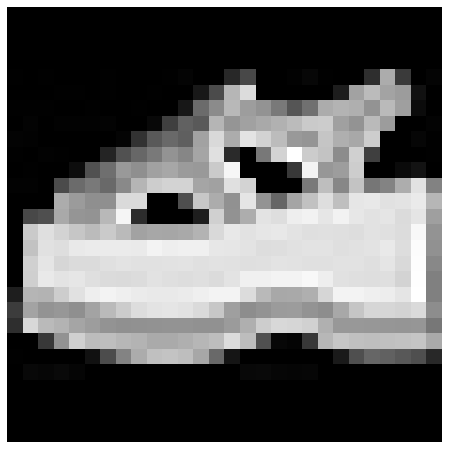

In [ ]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 1, 1
for i in range(1, cols * rows + 1):
    sample_idx = 33388
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [ ]:
type(training_data)

torchvision.datasets.mnist.FashionMNIST

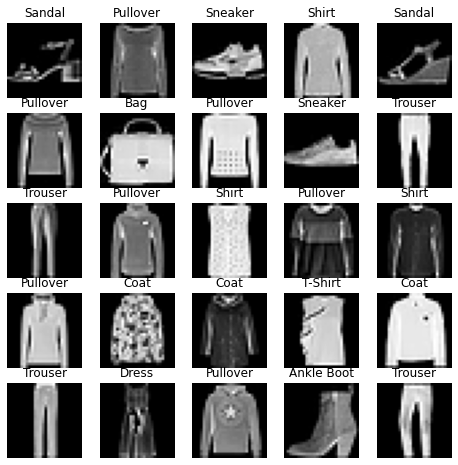

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

..
 .. figure:: /_static/img/basics/fashion_mnist.png
   :alt: fashion_mnist



--------------




Creación de un Dataset personalizado para nuestros archivos
--------------------------------------------------

Una clase Dataset personalizada debe implementar tres funciones: `__init__`, `__len__` y `__getitem__`. Echemos un vistazo a esta implementación; las imágenes de FashionMNIST se almacenan en un directorio ``img_dir``, y sus etiquetas se almacenan por separado en un archivo CSV ``annotations_file``.

En las siguientes secciones, desglosaremos lo que sucede en cada una de estas funciones.



In [ ]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

### \_\_init__

La función __init__ se ejecuta una vez al instanciar el objeto Dataset. Inicializamos el directorio que contiene las imágenes, el annotations_file y ambas transformaciones (tratadas con más detalle en la siguiente sección).

El archivo etiquetas.csv se ve así:


    tshirt1.jpg, 0
    tshirt2.jpg, 0
    ......
    ankleboot999.jpg, 9



In [ ]:
def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
    self.img_labels = pd.read_csv(annotations_file)
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform

### \_\_len__

La función __len__ devuelve el número de muestras en nuestro dataset.

Ejemplo:



In [ ]:
def __len__(self):
    return len(self.img_labels)

### \_\_getitem__

La función __getitem__ carga y devuelve una muestra del dataset en el índice dado ``idx``. Según el índice, identifica la ubicación de la imagen en el disco, la convierte en un tensor usando ``read_image``, recupera la etiqueta correspondiente de los datos csv en `self.img_labels``, llama a las funciones de transformación en ellos (si corresponde ) y devuelve la imagen del tensor y la etiqueta correspondiente en una tupla.



In [ ]:
def __getitem__(self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = read_image(img_path)
    label = self.img_labels.iloc[idx, 1]
    if self.transform:
        image = self.transform(image)
    if self.target_transform:
        label = self.target_transform(label)
    return image, label

--------------




Preparando nuestros datos para el entrenamiento con DataLoaders
-------------------------------------------------
El ``Dataset`` recupera las características y etiquetas de nuestro conjunto de datos una muestra a la vez. Mientras entrenamos un modelo, normalmente queremos pasar muestras en "minilotes", mezclar los datos en cada época para reducir el sobreajuste del modelo y usar el ``multiprocesamiento`` de Python para acelerar la recuperación de datos.

``DataLoader`` es un iterador que abstrae esta complejidad para nosotros en una API fácil.


In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Iterar a través del DataLoader
--------------------------

Hemos cargado ese conjunto de datos en ``DataLoader`` y podemos iterar a través del dataset según sea necesario. Cada iteración a continuación devuelve un lote de ``train_features`` y ``train_labels`` (que contienen ``batch_size=64`` para las características y etiquetas respectivamente). Debido a que especificamos ``shuffle=True``, después de iterar sobre todos los lotes, los datos se mezclan (para un control más detallado sobre el orden de carga de datos, eche un vistazo a [Samplers](https://pytorch.org/docs/stable/data.html#data-loading-order-and-sampler)).



Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


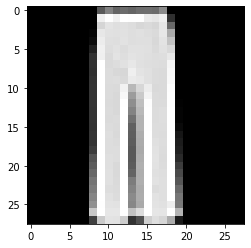

Label: 1


In [ ]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

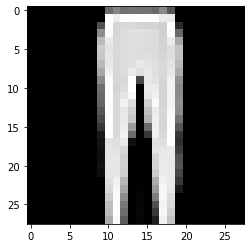

Label: 1


In [ ]:
img = train_features[63].squeeze()
label = train_labels[63]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

--------------




Para más información
--------------
- [torch.utils.data API](https://pytorch.org/docs/stable/data.html)



Los fundamentos de Autograd
============================




La función *Autograd* de PyTorch es parte de lo que hace que PyTorch sea flexible y rápido para crear proyectos de aprendizaje automático. Permite el cálculo rápido y sencillo de múltiples derivadas parciales (también conocidas como *gradientes)* en un cálculo complejo. Esta operación es fundamental para el aprendizaje de redes neuronales basado en backpropagation.

El poder de autograd proviene del hecho de que rastrea su
computación dinámicamente *en tiempo de ejecución*, lo que significa que si su modelo tiene ramas de decisión o bucles cuyas longitudes no se conocen hasta el tiempo de ejecución, la computación aún se rastreará correctamente y obtendrá gradientes correctos para impulsar el aprendizaje. Esto, combinado con el hecho de que sus modelos están construidos en Python, ofrece mucha más flexibilidad que los frameworks que se basan en el análisis estático de un modelo de estructura más rígida para calcular gradientes.



¿Para qué necesitamos Autograd?
--------------------------------------------

Un modelo de aprendizaje automático es una *función*, con entradas y salidas. Para esta discusión, trataremos a las entradas como un vector de dimensión *i* $\vec{x}$, con elementos $x_{i}$. Entonces podemos expresar el modelo, *M*, como una función vectorial de la entrada: $\vec{y} = \vec{M}(\vec{x})$. (Tratamos el valor de la salida de M como un vector porque, en general, un modelo puede tener cualquier número de salidas).

Dado que principalmente hablaremos de autograd en el contexto del entrenamiento, nuestro resultado de interés será la pérdida del modelo. La *función de pérdida* L($\vec{y}$) = L($\vec{M}$($\vec{x}$)) es una función escalar de valor único que depende de la salida del modelo. Esta función expresa qué tan lejos estaba la predicción de nuestro modelo de la salida *ideal* de una entrada en particular. *Nota: después de este punto, a menudo omitiremos el signo del vector donde debería ser contextualmente claro, por ejemplo,* $y$ en lugar de $\vec y$.

Al entrenar un modelo, queremos minimizar la pérdida. En el caso idealizado de un modelo perfecto, eso significa ajustar sus pesos de aprendizaje, es decir, los parámetros ajustables de la función, de modo que la pérdida sea cero para todas las entradas. En el mundo real, significa un proceso iterativo de empujar los pesos de aprendizaje hasta que veamos que obtenemos una pérdida tolerable para una amplia variedad de entradas.

¿Cómo decidimos hasta dónde y en qué dirección empujar los pesos? Queremos *minimizar* la pérdida, lo que significa hacer que su primera derivada con respecto a la entrada sea igual a 0:
$\frac{\partial L}{\partial x} = 0$.

Sin embargo, recuerde que la pérdida no se deriva *directamente* de la entrada, sino que es una función de la salida del modelo (que es una función directa de la entrada), $\frac{\partial L}{\partial x}$ =
$\frac{\partial {L({\vec y})}}{\partial x}$. 

Por la regla de la cadena del cálculo diferencial, tenemos

$$\frac{\partial {L({\vec y})}}{\partial x} =
\frac{\partial L}{\partial y}\frac{\partial y}{\partial x} =
\frac{\partial L}{\partial y}\frac{\partial M(x)}{\partial x}$$

$\frac{\partial M(x)}{\partial x}$ es donde las cosas se ponen complejas.
Las derivadas parciales de las salidas del modelo con respecto a sus entradas, si tuviéramos que expandir la expresión usando la regla de la cadena nuevamente, involucrarían muchas derivadas parciales locales sobre cada peso de aprendizaje multiplicado, cada función de activación y cualquier otra transformación matemática en el modelo. La expresión completa para cada derivada parcial es la suma de los productos del gradiente local de *todas las rutas posibles* a través del grafo computacional que termina con la variable cuyo gradiente estamos tratando de medir.

En particular, los gradientes sobre los pesos de aprendizaje nos interesan: nos dicen *en qué dirección cambiar cada peso* para acercar la función de pérdida a cero. Dado que el número de tales derivadas locales (cada uno correspondiente a una ruta separada a través del grafo commputacional del modelo) tenderá a aumentar exponencialmente con la profundidad de una red neuronal, también lo hace la complejidad de calcularlas. 

![Imgur](https://i.imgur.com/vnYfIrR.png)


Aquí es donde entra en juego autograd: realiza un seguimiento del historial de cada cálculo. Cada tensor calculado en su modelo PyTorch lleva un historial de sus tensores de entrada y la función utilizada para crearlo. Combinado con el hecho de que las funciones de PyTorch destinadas a actuar sobre tensores tienen una implementación integrada para calcular sus propias derivadas, esto acelera enormemente el cálculo de las derivadas locales necesarias para el aprendizaje.






Un ejemplo sencillo
----------------

Eso fue mucha teoría, pero ¿cómo se ve usar autograd en
¿práctica?

Comencemos con un ejemplo sencillo. Primero, haremos algunas importaciones.
para graficar nuestros resultados:

In [ ]:
# %matplotlib inline

import torch

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math

A continuación, crearemos un tensor de entrada lleno de valores espaciados uniformemente en el intervalo $[0, 2{\pi}]$ y especificaremos ``requires_grad=True``. (Como la mayoría de las funciones que crean tensores, ``torch.linspace()`` acepta una opción ``requires_grad`` opcional). Establecer este indicador significa que en cada cálculo que sigue, autograd acumulará el historial del cálculo en el tensores de salida de ese cálculo.


In [ ]:
a = torch.linspace(0., 2. * math.pi, steps=25, requires_grad=True)
print(a)

tensor([0.0000, 0.2618, 0.5236, 0.7854, 1.0472, 1.3090, 1.5708, 1.8326, 2.0944,
        2.3562, 2.6180, 2.8798, 3.1416, 3.4034, 3.6652, 3.9270, 4.1888, 4.4506,
        4.7124, 4.9742, 5.2360, 5.4978, 5.7596, 6.0214, 6.2832],
       requires_grad=True)



A continuación, realizaremos un cálculo y graficaremos su salida en términos de sus entradas:



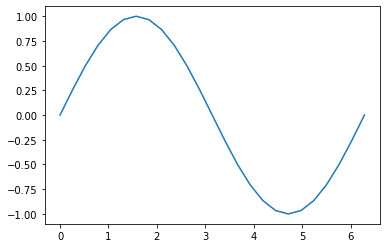

In [ ]:
b = torch.sin(a)
plt.plot(a.detach(), b.detach())


Echemos un vistazo más de cerca al tensor ``b``. Cuando lo imprimimos, vemos un indicador de que está rastreando su historial de cómputo:



In [ ]:
print(b)

tensor([ 0.0000e+00,  2.5882e-01,  5.0000e-01,  7.0711e-01,  8.6603e-01,
         9.6593e-01,  1.0000e+00,  9.6593e-01,  8.6603e-01,  7.0711e-01,
         5.0000e-01,  2.5882e-01, -8.7423e-08, -2.5882e-01, -5.0000e-01,
        -7.0711e-01, -8.6603e-01, -9.6593e-01, -1.0000e+00, -9.6593e-01,
        -8.6603e-01, -7.0711e-01, -5.0000e-01, -2.5882e-01,  1.7485e-07],
       grad_fn=<SinBackward0>)


Este ``grad_fn`` nos da una pista de que cuando ejecutemos el
paso de backpropagation y calculemos los gradientes, necesitaremos calcular la derivada de $sin(x)$ para todas las entradas de este tensor.

Realicemos algunos cálculos más:




In [ ]:
c = 2 * b
print(c)

d = c + 1
print(d)

tensor([ 0.0000e+00,  5.1764e-01,  1.0000e+00,  1.4142e+00,  1.7321e+00,
         1.9319e+00,  2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,
         1.0000e+00,  5.1764e-01, -1.7485e-07, -5.1764e-01, -1.0000e+00,
        -1.4142e+00, -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00,
        -1.7321e+00, -1.4142e+00, -1.0000e+00, -5.1764e-01,  3.4969e-07],
       grad_fn=<MulBackward0>)
tensor([ 1.0000e+00,  1.5176e+00,  2.0000e+00,  2.4142e+00,  2.7321e+00,
         2.9319e+00,  3.0000e+00,  2.9319e+00,  2.7321e+00,  2.4142e+00,
         2.0000e+00,  1.5176e+00,  1.0000e+00,  4.8236e-01, -3.5763e-07,
        -4.1421e-01, -7.3205e-01, -9.3185e-01, -1.0000e+00, -9.3185e-01,
        -7.3205e-01, -4.1421e-01,  4.7684e-07,  4.8236e-01,  1.0000e+00],
       grad_fn=<AddBackward0>)


Finalmente, calculemos una salida de un solo elemento. Cuando llamas a ``.backward()`` en un tensor sin argumentos, se espera que el tensor de llamada contenga solo un elemento, como es el caso cuando se calcula una función de pérdida.




In [ ]:
out = d.sum()
print(out)

tensor(25., grad_fn=<SumBackward0>)


Cada ``grad_fn`` almacenado con nuestros tensores le permite recorrer el cálculo hasta sus entradas con su atributo ``next_functions``. Podemos ver a continuación que profundizar en este atributo en ``d`` nos muestra las funciones de gradiente para todos los tensores anteriores. Tenga en cuenta que ``a.grad_fn`` se informa como ``None``, lo que indica que esta fue una entrada a la función sin historial propio.




In [ ]:
print('d:')
print(d.grad_fn)
print(d.grad_fn.next_functions)
print(d.grad_fn.next_functions[0][0].next_functions)
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions)
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0].next_functions)
print('\nc:')
print(c.grad_fn)
print('\nb:')
print(b.grad_fn)
print('\na:')
print(a.grad_fn)

d:
((<MulBackward0 object at 0x7fce807cf910>, 0), (None, 0))
((<SinBackward0 object at 0x7fce807cf190>, 0), (None, 0))
((<AccumulateGrad object at 0x7fce807cf1d0>, 0),)
()

c:

b:

a:
None


Con toda esta maquinaria en su lugar, ¿cómo sacamos las derivadas? Llama al método ``backward()`` en la salida y verifica el atributo ``grad`` de la entrada para inspeccionar los gradientes:




tensor([ 2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,  1.0000e+00,
         5.1764e-01, -8.7423e-08, -5.1764e-01, -1.0000e+00, -1.4142e+00,
        -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00, -1.7321e+00,
        -1.4142e+00, -1.0000e+00, -5.1764e-01,  2.3850e-08,  5.1764e-01,
         1.0000e+00,  1.4142e+00,  1.7321e+00,  1.9319e+00,  2.0000e+00])


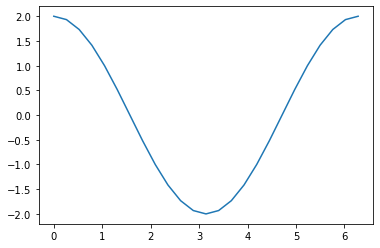

In [ ]:
out.backward()
print(a.grad)
plt.plot(a.detach(), a.grad.detach())

Recuerde los pasos de cálculo que tomamos para llegar aquí:

In [ ]:
a = torch.linspace(0., 2. * math.pi, steps=25, requires_grad=True)
b = torch.sin(a)
c = 2 * b
d = c + 1
out = d.sum()

Sumar una constante, como hicimos para calcular ``d``, no cambia la derivada. Eso deja $c = 2 * b = 2 * sin(a)$, cuya derivada debería ser $2 * cos(a)$. Mirando el gráfico de arriba, eso es justo lo que vemos.

Tenga en cuenta que solo los *nodos hoja* del cálculo tienen sus gradientes calculados. Si intentara, por ejemplo, ``print(c.grad)`` obtendría ``None``. En este ejemplo simple, solo la entrada es un nodo de hoja, por lo que solo ella tiene gradientes calculados.








Activar y desactivar Autograd
---------------------------

Hay situaciones en las que necesitará un control detallado sobre
si autograd está habilitado. Hay varias formas de hacer esto, dependiendo de la situación.

El más simple es cambiar el indicador ``requires_grad`` en un tensor
directamente:




In [ ]:
a = torch.ones(2, 3, requires_grad=True)
print(a)

b1 = 2 * a
print(b1)

a.requires_grad = False
b2 = 2 * a
print(b2)

tensor([[1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)
tensor([[2., 2., 2.],
        [2., 2., 2.]], grad_fn=<MulBackward0>)
tensor([[2., 2., 2.],
        [2., 2., 2.]])



En la celda de arriba, vemos que ``b1`` tiene un ``grad_fn`` (es decir, un historial de cálculo rastreado), que es lo que esperamos, ya que se derivó de un tensor, ``a``, que tenía activado el autograd. Cuando desactivamos autograd explícitamente con ``a.requires_grad = False``, ya no se rastrea el historial de cálculo, como vemos cuando calculamos ``b2``.

Si solo necesita que Autograd se apague temporalmente, una mejor manera es usar ``torch.no_grad()``:



In [ ]:
a = torch.ones(2, 3, requires_grad=True) * 2
b = torch.ones(2, 3, requires_grad=True) * 3

c1 = a + b
print(c1)

with torch.no_grad():
    c2 = a + b

print(c2)

c3 = a * b
print(c3)

tensor([[5., 5., 5.],
        [5., 5., 5.]], grad_fn=<AddBackward0>)
tensor([[5., 5., 5.],
        [5., 5., 5.]])
tensor([[6., 6., 6.],
        [6., 6., 6.]], grad_fn=<MulBackward0>)


``torch.no_grad()`` también se puede usar como decorador de funciones o métodos:




In [ ]:
def add_tensors1(x, y):
    return x + y

@torch.no_grad()
def add_tensors2(x, y):
    return x + y


a = torch.ones(2, 3, requires_grad=True) * 2
b = torch.ones(2, 3, requires_grad=True) * 3

c1 = add_tensors1(a, b)
print(c1)

c2 = add_tensors2(a, b)
print(c2)

tensor([[5., 5., 5.],
        [5., 5., 5.]], grad_fn=<AddBackward0>)
tensor([[5., 5., 5.],
        [5., 5., 5.]])


Hay un administrador de contexto correspondiente, ``torch.enable_grad()``, para activar la graduación automática cuando aún no lo está. También se puede utilizar como decorador.

Finalmente, puede tener un tensor que requiera seguimiento de gradiente, pero desea una copia que no lo requiera. Para esto tenemos el método ``detach()`` del objeto ``Tensor`` - crea una copia del tensor que se *separa* del historial de cálculo:




In [ ]:
  x = torch.rand(5, requires_grad=True)
  y = x.detach()

  print(x)
  print(y)

tensor([0.7383, 0.3592, 0.3865, 0.6531, 0.1412], requires_grad=True)
tensor([0.7383, 0.3592, 0.3865, 0.6531, 0.1412])


Hicimos esto arriba cuando queríamos graficar algunos de nuestros tensores. Esto se debe a que ``matplotlib`` espera una matriz NumPy como entrada, y la conversión implícita de un tensor PyTorch a una matriz NumPy no está habilitada para tensores con require_grad=True. Hacer una copia separada nos permite avanzar.


## Autograd y las Operaciones in situ


En todos los ejemplos de este cuaderno hasta ahora, hemos usado variables para capturar los valores intermedios de un cálculo. Autograd necesita estos valores intermedios para realizar cálculos de gradiente. ***Por esta razón, debe tener cuidado al usar operaciones in situ cuando use autograd.*** Si lo hace, puede destruir la información que necesita para calcular las derivadas en la llamada ``backward()``. PyTorch incluso lo detendrá si intenta una operación in situ en la variable de hoja que requiere autograduación, como se muestra a continuación.



In [ ]:
a = torch.linspace(0., 2. * math.pi, steps=25, requires_grad=True)
torch.sin_(a)

RuntimeError: ignored

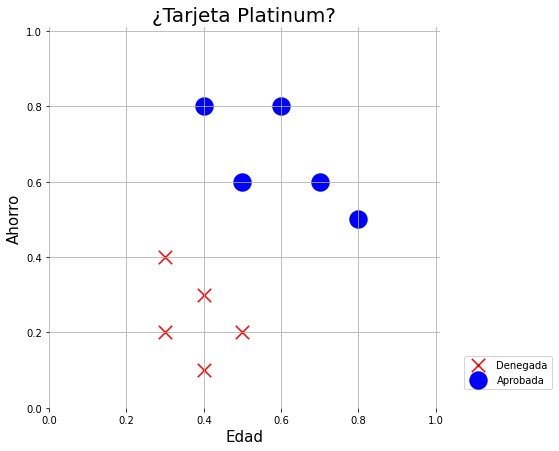

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de 10 personas -> [edad, ahorro]

personas = np.array([[0.3, 0.4], [0.4, 0.3],
                     [0.3, 0.2], [0.4, 0.1], 
                     [0.5, 0.2], [0.4, 0.8],
                     [0.6, 0.8], [0.5, 0.6], 
                     [0.7, 0.6], [0.8, 0.5]])

# 1 : aprobrada    0 : denegada

clases = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

# Gráfica de dispersión (edad, ahorro)
plt.figure(figsize=(7, 7))
plt.title("¿Tarjeta Platinum?", fontsize=20)
plt.scatter(personas[clases == 0].T[0], 
            personas[clases == 0].T[1], 
            marker="x", s=180, color="red",
            linewidths=5, label="Denegada")
plt.scatter(personas[clases == 1].T[0],
            personas[clases == 1].T[1], 
            marker="o", s=180, color="blue",
            linewidths=5, label="Aprobada")
plt.xlabel("Edad", fontsize=15)
plt.ylabel("Ahorro", fontsize=15)
plt.legend(bbox_to_anchor=(1.3, 0.15))
plt.box(False)
plt.xlim((0, 1.01))
plt.ylim((0, 1.01))
plt.grid()
plt.show()

In [ ]:
# w1*x1 + w2*x2 + ⋯ + wn*xn

def activacion(pesos, x, b):
    z = pesos * x
    if z.sum() + b > 0:
        return 1
    else:
        return 0

pesos = np.random.uniform(-1, 1, size=2)
b = np.random.uniform(-1, 1)

pesos, b, activacion(pesos, [0.5, 0.4], b)

(array([-0.8124167 ,  0.42163744]), 0.6076774829329059, 1)

In [ ]:
_pesos = np.random.uniform(-1, 1, size=2)
_b = np.random.uniform(-1, 1)
tasa_de_aprendizaje = 0.01
epocas = 100


In [ ]:
_pesos, _b

(array([0.38669401, 0.03776164]), -0.8757872188996649)

In [ ]:
clases

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [ ]:
personas[0]*_pesos

array([0.1160082 , 0.01510466])

In [ ]:
activacion(_pesos, personas[0], _b)

0

In [ ]:
personas

array([[0.3, 0.4],
       [0.4, 0.3],
       [0.3, 0.2],
       [0.4, 0.1],
       [0.5, 0.2],
       [0.4, 0.8],
       [0.6, 0.8],
       [0.5, 0.6],
       [0.7, 0.6],
       [0.8, 0.5]])

In [ ]:
for i in range(len(personas)):
  print(activacion(_pesos, personas[i], _b))
  print("error", clases[i]-activacion(_pesos, personas[i], _b))

0
error 0
0
error 0
0
error 0
0
error 0
0
error 0
0
error 1
0
error 1
0
error 1
0
error 1
0
error 1


In [ ]:
pesos = _pesos.copy()
b = _b
pesos = np.zeros((2,1))
b= 0

pesos = np.array([[1.1],[ 1. ]])
b= -1
for epoca in range(epocas):
    error_total = 0
    for i in range(len(personas)):
        prediccion = activacion(pesos, personas[i], b)
        error = clases[i] - prediccion
        error_total += error**2
        pesos[0] += tasa_de_aprendizaje * personas[i][0] * error
        pesos[1] += tasa_de_aprendizaje * personas[i][1] * error
        b += tasa_de_aprendizaje * error 
    print(error_total, end=" ")



5 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [ ]:
pesos,b

(array([[0.   ],
        [0.013]]), -0.01)

In [ ]:
pesos,b

(array([[0.973],
        [0.907]]), -1.3200000000000003)

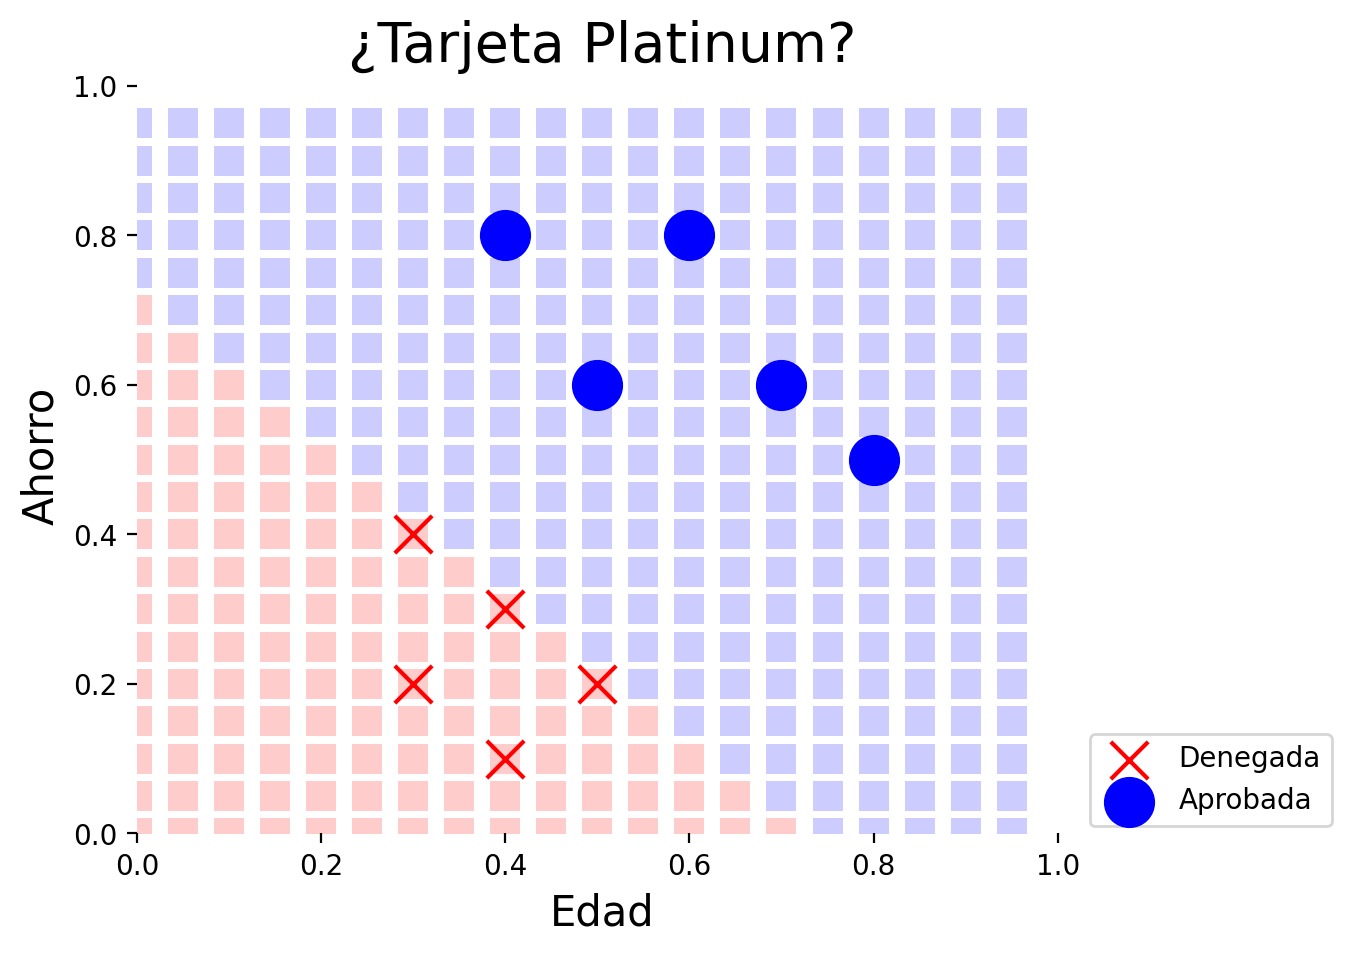

In [ ]:
plt.figure(figsize=(6, 5), dpi=200)
plt.title("¿Tarjeta Platinum?", fontsize=20)

plt.scatter(personas[clases == 0].T[0], 
            personas[clases == 0].T[1], 
            marker="x", s=180, color="red",
            linewidths=5, label="Denegada")

plt.scatter(personas[clases == 1].T[0],
            personas[clases == 1].T[1], 
            marker="o", s=180, color="blue",
            linewidths=5, label="Aprobada")

for edad in np.arange(0, 1, 0.05):
    for ahorro in np.arange(0, 1, 0.05):
        color = activacion(pesos, [edad, ahorro], b)
        if color == 1:
            plt.scatter(edad, ahorro, marker="s", s=110,
                        color="blue", alpha=0.2, linewidths=0)
        else:
            plt.scatter(edad, ahorro, marker="s", s=110, 
                        color="red", alpha=0.2, linewidths=0)
            
plt.xlabel("Edad", fontsize=15)
plt.ylabel("Ahorro", fontsize=15)
plt.legend(bbox_to_anchor=(1.3, 0.15))
plt.box(False)
plt.xlim((0, 1.01))
plt.ylim((0, 1.01))
plt.show()

In [ ]:
from sklearn.linear_model import Perceptron
perceptron = Perceptron().fit(personas, clases)
perceptron.predict([[0.2, 0.2]])

ValueError: ignored

In [ ]:
perceptron.intercept_, perceptron.coef_

(array([-1.]), array([[1.1, 1. ]]))

In [ ]:
perceptron.coef_

array([[1.1, 1. ]])

In [ ]:
-b

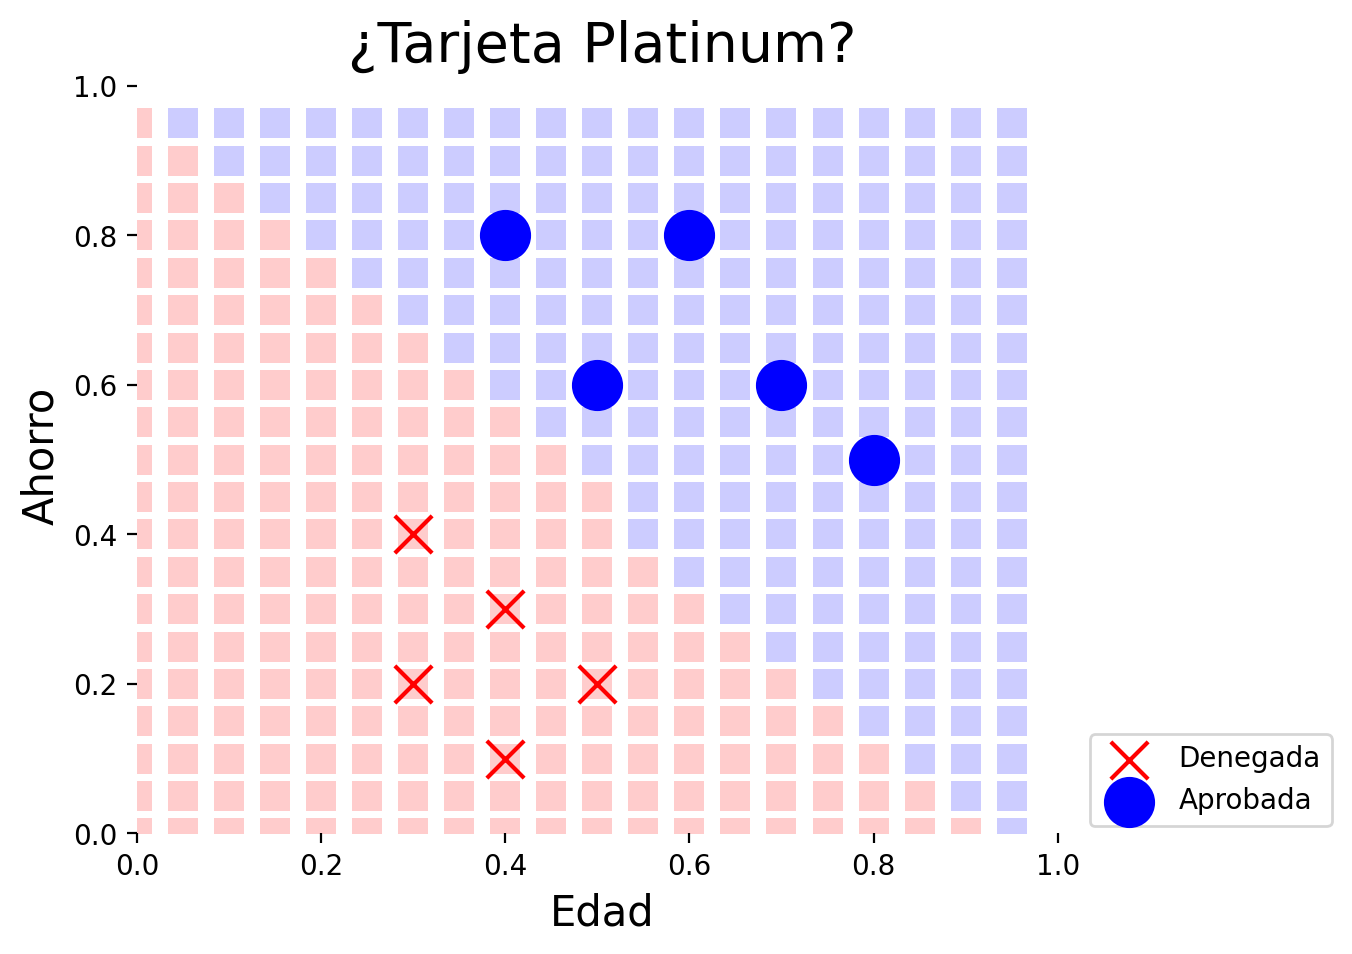

In [ ]:
plt.figure(figsize=(6, 5), dpi=200)
plt.title("¿Tarjeta Platinum?", fontsize=20)

plt.scatter(personas[clases == 0].T[0], 
            personas[clases == 0].T[1], 
            marker="x", s=180, color="red",
            linewidths=5, label="Denegada")

plt.scatter(personas[clases == 1].T[0],
            personas[clases == 1].T[1], 
            marker="o", s=180, color="blue",
            linewidths=5, label="Aprobada")

for edad in np.arange(0, 1, 0.05):
    for ahorro in np.arange(0, 1, 0.05):
        color = perceptron.predict([[edad,ahorro]]) 
        if color == 1:
            plt.scatter(edad, ahorro, marker="s", s=110,
                        color="blue", alpha=0.2, linewidths=0)
        else:
            plt.scatter(edad, ahorro, marker="s", s=110, 
                        color="red", alpha=0.2, linewidths=0)
            
plt.xlabel("Edad", fontsize=15)
plt.ylabel("Ahorro", fontsize=15)
plt.legend(bbox_to_anchor=(1.3, 0.15))
plt.box(False)
plt.xlim((0, 1.01))
plt.ylim((0, 1.01))
plt.show()